# Brownian Motion - Financial Mathematics

Here we will investigate the stochastoc process that is the buildomg block fo financial mathematics.
>We will consider:


*   Symmeteric Random Walk
*   Scaled Random Walk
*   Browian Motion

And We Will Also Dive Into Diff. Terminologies Related To The Topic.






# Importing Libraries

In [3]:
import math
import itertools
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
# Brownian Motion -> Continious stochastic process which exihibits the property of a random walk.

# Brownian Motion, helps us

# Symmetric Random Walk

1. Successive coin tosses, w = w1,w2,w3...., Where wn is the outcome of the nth toss.

2. **Indicator variable** \( x_j \):  
   \[
   x_j =
   \begin{cases}
   1 & \text{if } w_j = H \\
   -1 & \text{if } w_j = T
   \end{cases}
   \]

3. Stochastic Process Mk = Summation(Xj) from j=1 to k


In [5]:
# Parameters
M = 10 # number of simulation
t = 10 # Time

In [6]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t)).T
origin = np.zeros((1,M))
rw_path = np.concatenate([origin, steps]).cumsum(axis=0)

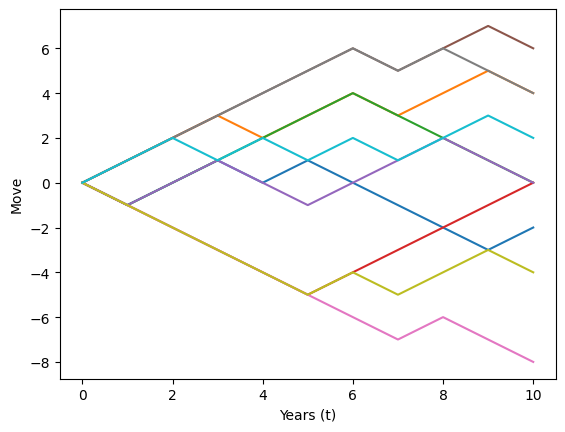

In [7]:
plt.plot(rw_path)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

# Properties of a Symmetric Random Walk
1. Independent Incremens
2. Martingale
3. Quadratic Variation


In [8]:
# Create Quadratic variation and Variance Functions
quadratic_variation = lambda x: round(np.square(x[:1]-x[1:]).sum(),3)
variance = lambda x: round(np.var(x,axis=0),3)

In [9]:
[quadratic_variation(path) for path in rw_path.T[:4]]

[21.0, 109.0, 45.0, 85.0]

In [10]:
# Change the number of simulation to 10,000,000 to observe variance convergence on Time
[variance(path) for path in rw_path.T[:4]]

[1.504, 1.967, 2.231, 2.562]

# Scaled Symmetric Random Walk

To approximate a Browian Motion we can speed up time and scale down the step size

Wn(t) = (1/√n)Mnt

In [11]:
# Parameters
M = 10 # number of simulation
t = 10 # Time
n = 10

In [16]:
random_walk = [-1, 1]
steps = np.random.choice(random_walk, size=(M,t*n)).T
origin = np.zeros((1,M))
srw_path = np.concatenate([origin, steps]).cumsum(axis=0)

In [17]:
time = np.linspace(0, t, t*n+1)
tt = np.full(shape=(M, t*n+1), fill_value=time)
tt = tt.T

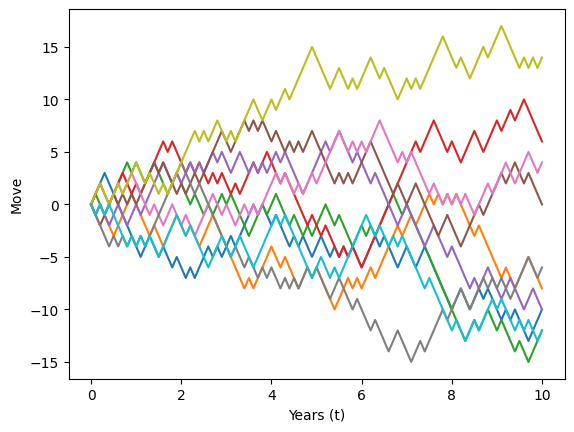

In [18]:
plt.plot(tt, rw_path)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [20]:
# Change the number of simulation to 100,000 to observe variance convergence on Time
[variance(path) for path in srw_path[1:11]]

[0.96, 1.44, 2.24, 3.04, 4.36, 4.96, 4.64, 4.2, 3.24, 5.44]

In [21]:
[quadratic_variation(path) for path in srw_path[:4]]

[0.0, 16.0, 40.0, 24.0]

In [22]:
# Change the parameter n to see the impact of increasing the discretization
# of the random walk and how it converges on the normal distribution

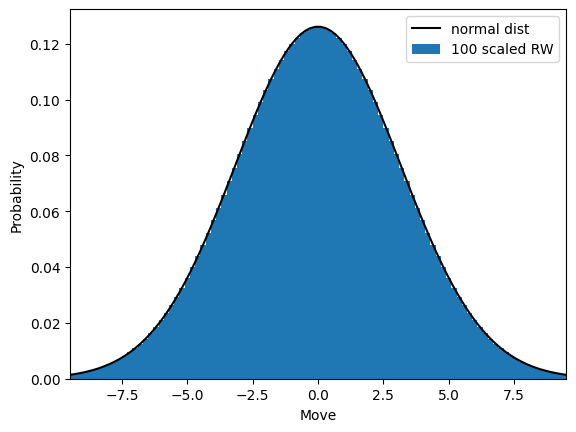

In [40]:
n = 100
t = 10

# Combinations
def nCr(n,k):
    f = math.factorial
    return f(n) / (f(k) * f(n-k))

perms = [nCr(n*t,k)*(0.5)**(n*t) for k in range(int(n*t)+1)]

W_nt = lambda n,t: 1/np.sqrt(n) * np.arange(-n*t,n*t+1,2)

outcomes = W_nt(n,t)
plt.bar(outcomes,[perm/(outcomes[1]-outcomes[0]) for perm in perms],outcomes[1]-outcomes[0],
        label='{0} scaled RW'.format(n))

x = np.linspace(-3*np.sqrt(t), 3*np.sqrt(t), 100)
plt.plot(x, stats.norm.pdf(x, 0, np.sqrt(t)), 'k-',label='normal dist')

plt.xlim(-3*np.sqrt(t),3*np.sqrt(t))
plt.ylabel("Probability")
plt.xlabel("Move")
plt.legend()
plt.show()

# Brownian Motion
lim(n->♾️) W(n)(t)〜N(0, t)

A Brownian motion is a stochastic process {W}tℰ[0,T]

Filtered probabiltiy space(Ω,𝓕,ℙ, {𝓕t})

W: [0,T] x Ω -> R

1. W0 = 0
2. W has independent increments
3. W has Gaussian(normal) increments
4. W has continuous sample paths(almost surely).

In [28]:
# Parameters
M = 10 # number of simulations
t = 10 # Time
n = 100 # steps we want to see
dt = t/n # time step

In [29]:
steps = np.random.normal(0, np.sqrt(dt), size=(M,n)).T
origin = np.zeros((1,M))
bm_path = np.concatenate([origin, steps]).cumsum(axis=0)

In [30]:
time = np.linspace(0, t, n+1)
origin = np.zeros((1,M))
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

In [31]:
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
bm_paths = np.concatenate([origin, steps]).cumsum(axis=0)

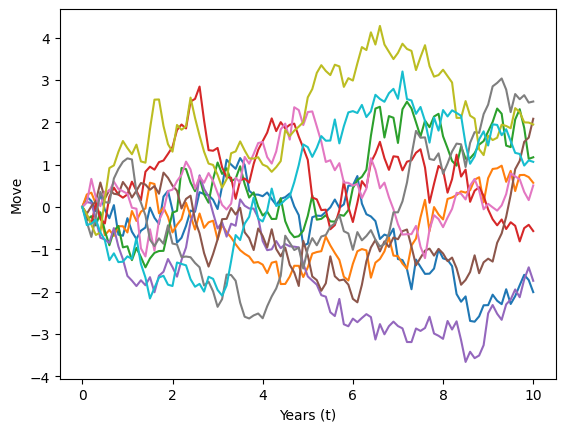

In [33]:
time = np.linspace(0,t,n+1)
tt = np.full(shape=(M, n+1), fill_value=time)
tt = tt.T

plt.plot(tt, bm_paths)
plt.xlabel("Years (t)")
plt.ylabel("Move")
plt.show()

In [34]:
# Change time steps to 1,000,000 to observe same quadratic variaton along paths
[quadratic_variation(path) for path in bm_paths.T[:4]]

[128.744, 81.973, 151.01, 118.018]

In [35]:
# Chnage simulations to 100,000 to observe convergance of variance to Time at a particular time step
[variance(path) for path in bm_paths[1:11]]

[0.06, 0.155, 0.073, 0.177, 0.179, 0.438, 0.431, 0.623, 0.881, 0.886]